## **Morphological Discrimination of Neoplastic Cells for Cancer Diagnostic.**


*Early diagnosis of cancer focuses on detecting symptomatic patients as early as possible so they have the best chance for successful treatment. When cancer care is delayed or inaccessible there is a lower chance of survival, greater problems associated with treatment and higher costs of care. Early diagnosis improves cancer outcomes by providing care at the earliest possible stage and is therefore an important public health strategy in all settings.*
                         **-source WHO**


 Here, we are building and training a model using human cell records, and classify cells to whether the samples are benign or malignant.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns


# Loading the Dataset

The dataset used here is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

<br>
<br>

In [ ]:
cell_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
cell_df.head(11)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


<Axes: xlabel='UnifShape', ylabel='UnifSize'>

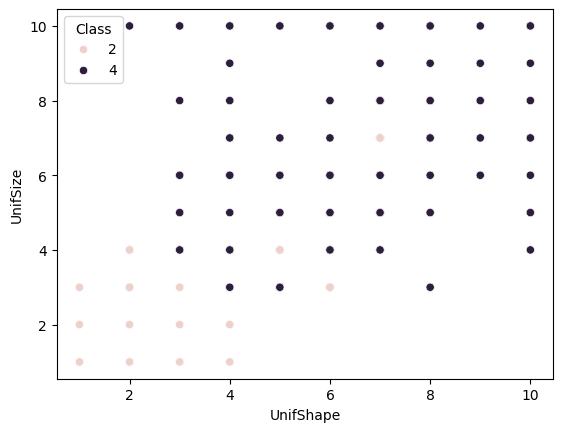

In [ ]:
sns.scatterplot(x="UnifShape", y="UnifSize", hue="Class", data=cell_df)

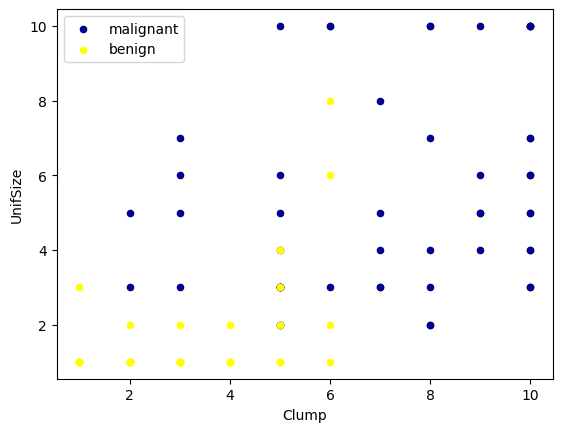

In [ ]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## Data pre-processing and selection

In [ ]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [ ]:
# converting object to int64
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-8-0b336ada95ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [ ]:
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

## Train/Test dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# **Modeling**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

<h2 id="evaluation">Evaluation</h2>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrrix(cm,classes,normalize =False,title='Confusion matrix,cmap=plt.cm.Blues'):
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion Matrix")
    else:
        print('Confusion Matrix, without normalization')
    print(cm)

    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion Matrix, without normalization
[[85  0]
 [ 0  0]]


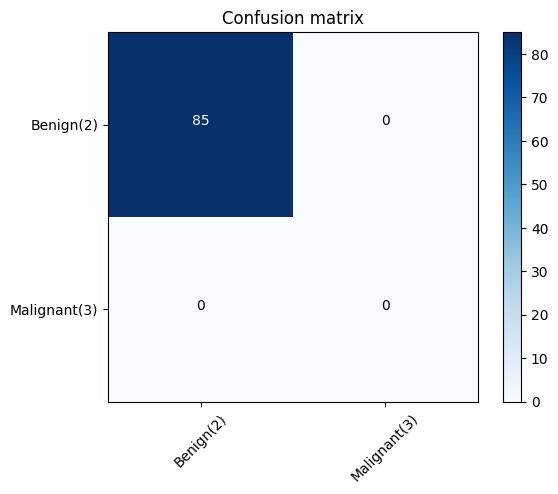

In [ ]:
#compute confusion matrix
cnf_matrix =confusion_matrix(y_test,yhat,labels=[2,3])

np.set_printoptions(precision=2)

print(classification_report(y_test,yhat))

#plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrrix(cnf_matrix,classes=['Benign(2)','Malignant(3)'],normalize=False,title='Confusion matrix')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

In [ ]:
#setting kernel =linear
clf2 =svm.SVC(kernel='linear')
clf2.fit(X_train,y_train)
yhat2=clf2.predict(X_test)
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

In [ ]:
#setting kernel =sigmoid
clf3 =svm.SVC(kernel='sigmoid')
clf3.fit(X_train,y_train)
yhat2=clf3.predict(X_test)
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

In [ ]:
from sre_constants import SUCCESS

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
import pandas as pd

# Define the prediction function
def predict(Clump, UnifSize, UnifShape, MargAdh, SingEpiSize, BareNuc, BlandChrom, NormNucl, Mit):
  # Convert the input data to a NumPy array
  input_data = np.asarray([[Clump, UnifSize, UnifShape, MargAdh, SingEpiSize, BareNuc, BlandChrom, NormNucl, Mit]])

  # Predict the class
  prediction =clf.predict(input_data)

  #prediction interface
  if prediction[0] == 2:
    return "Benign"
  else:
    return "Malignant"

# Creating the dashboard
interact(predict, Clump=(1, 10), UnifSize=(1, 10), UnifShape=(1, 10), MargAdh=(1, 10), SingEpiSize=(1, 10), BareNuc=(1, 10), BlandChrom=(1, 10), NormNucl=(1, 10), Mit=(1, 10))



interactive(children=(IntSlider(value=5, description='Clump', max=10, min=1), IntSlider(value=5, description='…

<function __main__.predict(Clump, UnifSize, UnifShape, MargAdh, SingEpiSize, BareNuc, BlandChrom, NormNucl, Mit)>

In [ ]:
#saving the model

import pickle

# Save the model to a file
with open('cell_model.pkl', 'wb') as f:
  pickle.dump(clf, f)

# Load the model from the file
with open('cell_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)


# New section